In [2]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
df = pd.read_csv("ETH.csv", usecols=['close_timestamp', 'open', 'high', 'low', 'close', 'volume'])
df.head()

,open,high,low,close,volume,close_timestamp
0,141969.5,141969.5,141961.0,141961.0,0.005381,2025-06-01 00:01:00
1,141955.1,141955.1,141955.1,141955.1,0.004260,2025-06-01 00:02:00
2,141983.9,141983.9,141940.8,141940.8,0.007991,2025-06-01 00:03:00
3,141981.6,141981.7,141938.1,141938.1,0.355642,2025-06-01 00:04:00
4,142131.8,142131.8,142103.6,142103.6,0.002545,2025-06-01 00:05:00


In [13]:
df.tail()

,open,high,low,close,volume,close_timestamp
19477,143625.9,143714.1,143625.9,143714.1,0.007503,2025-06-14 10:03:00
19478,143805.7,143923.5,143805.7,143923.5,0.005100,2025-06-14 10:04:00
19479,143728.6,143728.6,143671.9,143671.9,0.009440,2025-06-14 10:05:00
19480,143678.6,143823.4,143678.6,143823.4,0.006510,2025-06-14 10:06:00
19481,143702.5,143702.5,143502.1,143502.1,0.002286,2025-06-14 10:07:00


In [14]:
features = ['open', 'high', 'low', 'volume']
target = 'close'

train = df.iloc[:-50]
test = df.iloc[-50:]

X_train, y_train = train.drop(columns=['close_timestamp','close']), train['close']
X_test, y_test = test.drop(columns=['close_timestamp','close']), test['close']

y_train = y_train / 1e6
y_test = y_test / 1e6

In [15]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 19422, number of used features: 4
[LightGBM] [Info] Start training from score 0.144752


LGBMRegressor()

In [16]:
predictions = model.predict(X_test)

In [17]:
y_test = y_test * 1e6
y_pred_original = predictions * 1e6

In [18]:
mae = mean_absolute_error(y_test, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_original))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 54.85977798991759
RMSE: 76.19753772007417


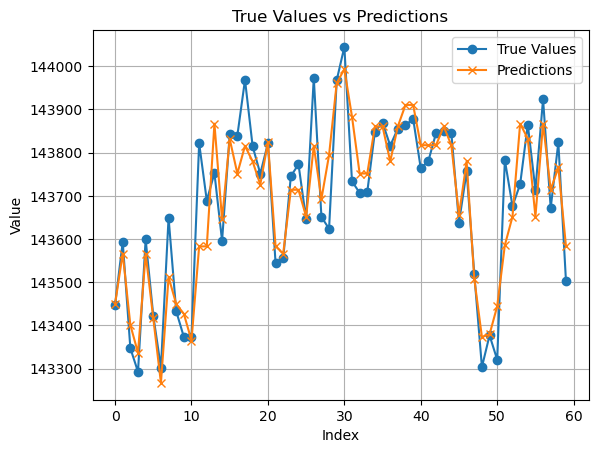

In [19]:
indices = range(len(y_test))  # x-axis: 0, 1, 2, ...

plt.plot(indices, y_test, label='True Values', marker='o')
plt.plot(indices, y_pred_original, label='Predictions', marker='x')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('True Values vs Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
joblib.dump(model, "eth_model.pkl")


['eth_model.pkl']